<a href="https://colab.research.google.com/github/SATHVIK-CONNECT/CODSOFT/blob/main/TreeSpeciesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import os
repo_path = "Tree_Species_Dataset"

%cd drive/MyDrive/TreeSpeciesClassification
!pwd

/content/drive/MyDrive/TreeSpeciesClassification


In [32]:
print("Contents: ", os.listdir(repo_path))

Contents:  ['simlo', 'pipal', 'other', 'sitafal', 'shirish', 'sugarcane', 'pilikaren', 'saptaparni', 'vad', 'sonmahor', 'kesudo', 'gulmohor', 'mango', 'motichanoti', 'jamun', 'khajur', 'kanchan', 'nilgiri', 'gunda', 'neem', 'asopalav', 'bili', 'champa', 'cactus', 'garmalo', 'banyan', 'bamboo', 'babul', 'coconut', 'amla', '.git']


In [36]:
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")

Number of classes: 31


In [38]:
import glob
image_paths = []
labels = []

for class_name in os.listdir(repo_path):
  class_folder = os.path.join(repo_path, class_name)
  if os.path.isdir(class_folder):
    for img_file in os.listdir(class_folder):
      image_paths.append(os.path.join(class_folder, img_file))
      labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 1605


In [44]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("Shape: ", class_counts_df.shape)

         Image Count
other            150
simlo             50
pipal             50
sitafal           50
shirish           50
Shape:  (31, 1)


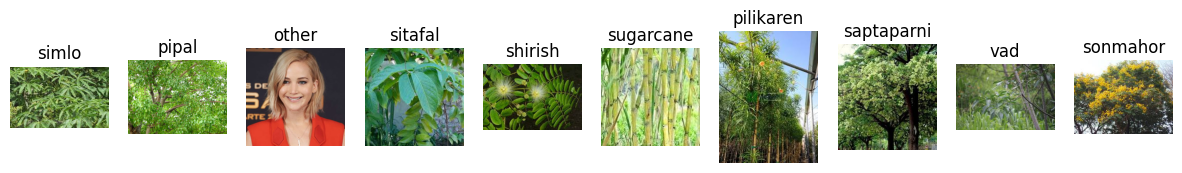

In [46]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
  plt.figure(figsize=(15,10))
  for i, class_dir in enumerate(class_dirs[:n]):
    img_path = os.path.join(repo_path, class_dir, os.listdir(os.path.join(repo_path, class_dir))[0])
    img = Image.open(img_path)
    plt.subplot(1, n , i+1)
    plt.imshow(img)
    plt.title(class_dir)
    plt.axis('off')
  plt.show()

show_sample_images(repo_path, class_dirs)

In [50]:
image_shapes = []

for class_dir in class_dirs:
  for img_file in os.listdir(os.path.join(repo_path, class_dir)):
    img_path = os.path.join(repo_path, class_dir, img_file)
    img = Image.open(img_path)
    image_shapes.append(img.size)

shapes_df = pd.DataFrame(image_shapes, columns=['width', 'height'])
shapes_df.head()

KeyboardInterrupt: 

In [51]:
print(shapes_df.describe())

NameError: name 'shapes_df' is not defined

In [52]:
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

for class_dir in class_dirs:
  for img_file in os.listdir(os.path.join(repo_path, class_dir)):
    img_path = os.path.join(repo_path, class_dir, img_file)
    with open(img_path, 'rb') as f:
      file_hash = hashlib.md5(f.read()).hexdigest()
      hashes[file_hash].append(img_path)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found: ", len(duplicates))

KeyboardInterrupt: 

In [53]:
corrupt_images = []

for class_dir in class_dirs:
  for img_file in os.listdir(os.path.join(repo_path, class_dir)):
    img_path = os.path.join(repo_path, class_dir, img_file)
    try:
      img = Image.open(img_path)
      img.verify()
    except Exception as e:
      corrupt_images.append(img_path)

print("Courrupted images: ", len(corrupt_images))

KeyboardInterrupt: 

In [ ]:
def show_duplicate_sets(duplicates, sets_to_display=3):
  shown = 0
  for hash_val, dup_paths in duplicates.items():
    if shown >= sets_to_display:
      break
    print(f"Duplicate set {set + 1}:")
    plt.figure(figsize=(15,4))
    for i, img_path in enumerate(dup_paths):
      try:
        img = Image.open(img_path)
        plt.subplot(1, len(dup_paths), i+1)
        plt.imshow(img)
        plt.title(os.path.basename(img_path))
        plt.axis('off')
      except:
        continue
      plt.show()
      shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [ ]:
import os

removed_count = 0

for dup_list in duplicates.values():
  for img_path in dupl_list[1:]:
    try:
      os.remove(img_path)
      removed_count += 1
    except Exception as e:
      print(f"Error deleting {img_path}: {e}")

print(f"Removed {removed_count} duplicate images.")

In [ ]:
hashes = defaultdict(list)

for class_dir in class_dirs:
  for img_path in os.listdir(os.path.join(repo_path, class_dir)):
    img_path = os.path.join(repo_path, class_dirm img_file)
    with open(img_path, 'rb') as f:
      file_hash = hashlib.md5(f.read().hexdigest())
      hashes[file_hash].append(img_path)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicates remaining: ", len(duplicates))